# K-Means clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import MDS
import sklearn.datasets as dt
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [90]:
grouped5 = pd.read_csv('data.csv', index_col=0)
grouped5['POSITION'] = grouped5['POSITION'].replace(['Center-Forward'], 'Forward-Center')
grouped5['POSITION'] = grouped5['POSITION'].replace(['Guard-Forward'], 'Forward-Guard')
features = grouped5.iloc[:, 3:]

In [3]:
mds = MDS(random_state=0) #dimensionality reduction using multidimensional scaling on the features
X_transform = mds.fit_transform(features)
X_transform

scaler = StandardScaler() #standardize the data
scaler.fit(X_transform)
kmeans = KMeans(n_clusters=5)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_transform_scaled = scaler.transform(X_transform)
kmeans.fit(X_transform_scaled)

labels = kmeans.predict(X_transform_scaled)
positions = grouped5['POSITION']
df = pd.DataFrame({'labels': labels, 'positions': positions})
ct = pd.crosstab(df['labels'], df['positions'])
ct

positions,Center,Forward,Forward-Center,Forward-Guard,Guard
labels,,,,,
0,13,39,17,10,4
1,0,32,5,24,37
2,0,5,0,17,72
3,20,27,30,1,0
4,0,7,0,9,42


In [4]:
#evaluate the quality of the clustering using inertia
kmeans.inertia_

183.65767025471902

C:\Users\gelias006\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


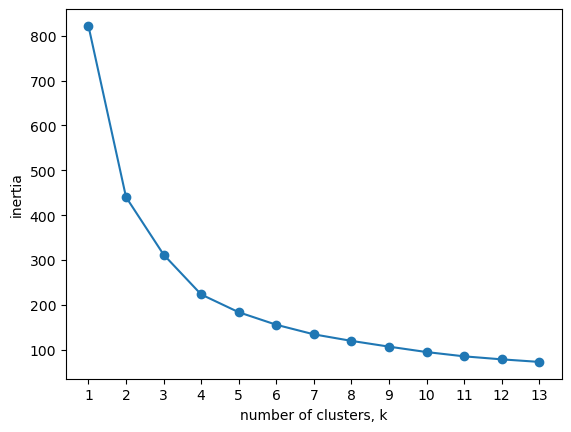

In [5]:
ks = range(1,14)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(X_transform_scaled)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

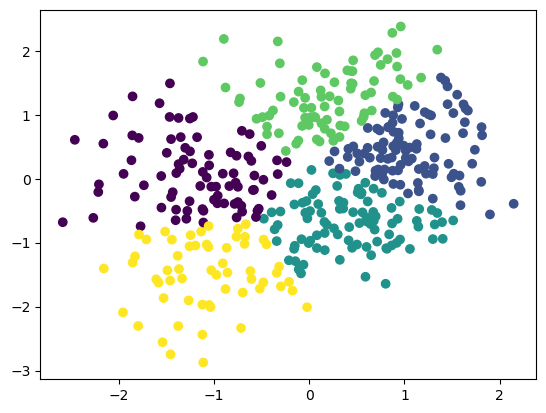

In [6]:
plt.scatter(X_transform_scaled[:,0],X_transform_scaled[:,1], c=labels)
plt.show()

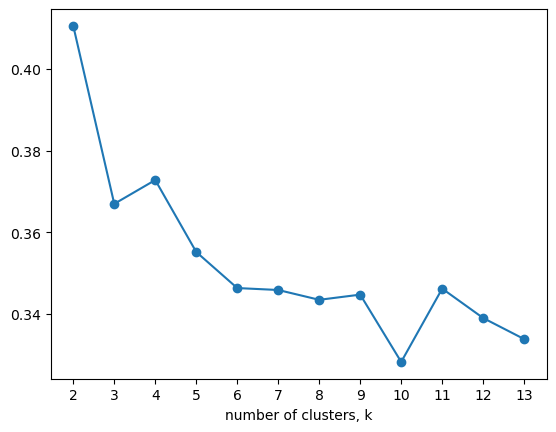

In [7]:
from sklearn.metrics import silhouette_score #analyze the quality of the clustering using silhouette score

ks = range(2,14)
sh = []

for k in ks:
    model = KMeans(n_clusters = k, random_state=42)
    model.fit_predict(X_transform_scaled)
    sh.append(silhouette_score(X_transform_scaled, model.labels_))
    
plt.plot(ks, sh, '-o')
plt.xlabel('number of clusters, k')
plt.xticks(ks)
plt.show()

In [8]:
grouped5['Cluster'] = df['labels']
grouped5[grouped5['Cluster'] == 4]

,PLAYER_ID,NAME,POSITION,HEIGHT_CM,WEIGHT_KG,GP,GS,FGM_G,FGA_G,FG_PCT,...,BLK_G,TOV_G,PF_G,PTS_G,AST_G,REB_G,OREB_G,DREB_G,MIN_G,Cluster
2,2738,Andre Iguodala,Forward-Guard,198.12,97.522360,67.944444,43.555556,3.838901,8.340112,0.459556,...,0.539381,1.732524,1.724989,10.624609,4.085920,4.783895,0.887976,3.895919,30.978307,4
3,101108,Chris Paul,Guard,182.88,79.378665,64.388889,64.388889,6.228555,13.291257,0.466167,...,0.158003,2.376253,2.468686,17.619239,9.518383,4.556774,0.620415,3.936359,34.437371,4
5,200768,Kyle Lowry,Guard,182.88,88.904105,58.157895,42.789474,4.314474,10.249175,0.418474,...,0.286336,2.225181,2.649232,13.596573,5.887475,4.103530,0.727152,3.376378,30.445228,4
9,201144,Mike Conley,Guard,185.42,79.378665,60.187500,57.937500,5.139767,11.995316,0.427750,...,0.241431,1.944247,1.970722,14.685921,5.673244,2.927524,0.442826,2.484698,31.699439,4
13,201566,Russell Westbrook,Guard,190.50,90.718474,68.266667,67.133333,7.912524,18.318411,0.427733,...,0.282901,3.950281,2.579595,22.112310,8.117288,7.353927,1.554450,5.799477,34.241538,4
16,201569,Eric Gordon,Guard,190.50,97.522360,50.200000,38.266667,5.602025,13.050648,0.429800,...,0.323494,2.004758,1.840969,16.479304,2.881992,2.383667,0.363498,2.020169,32.188567,4
26,201935,James Harden,Guard,195.58,99.790321,58.666667,46.722222,7.282411,16.428842,0.442333,...,0.576718,3.749361,2.494313,24.503564,7.865005,6.166536,0.779477,5.387059,35.346499,4
27,201937,Ricky Rubio,Guard,187.96,86.182550,60.454545,54.636364,3.647306,9.503754,0.383455,...,0.131928,2.657516,2.517697,11.163469,7.621329,4.239303,0.631091,3.608212,30.347678,4
28,201939,Stephen Curry,Guard,187.96,83.914588,59.285714,58.857143,8.195567,17.499056,0.468500,...,0.243529,3.069592,2.324969,24.211112,6.340733,4.736222,0.657737,4.078485,33.409510,4
29,201942,DeMar DeRozan,Forward-Guard,198.12,99.790321,68.714286,67.857143,7.541742,16.095047,0.469429,...,0.282525,2.075601,2.268986,21.051602,4.045771,4.392445,0.711847,3.680598,34.239099,4


In [9]:
for clusters in grouped5['Cluster'].unique():
    print(clusters, grouped5[grouped5['Cluster'] == clusters]['NAME'].values[:5])

0 ['LeBron James' 'Rudy Gay' 'P.J. Tucker' 'Kevin Durant' 'Al Horford']
3 ['Udonis Haslem' 'JaVale McGee' 'James Johnson' 'Bismack Biyombo'
 'Markieff Morris']
4 ['Andre Iguodala' 'Chris Paul' 'Kyle Lowry' 'Mike Conley'
 'Russell Westbrook']
2 ['Derrick Rose' 'George Hill' 'Goran Dragic' 'Patty Mills'
 'Garrett Temple']
1 ['Doug McDermott' 'Justise Winslow' 'Christian Wood' 'Chasson Randle'
 'Quinn Cook']


# Hierarchical clustering

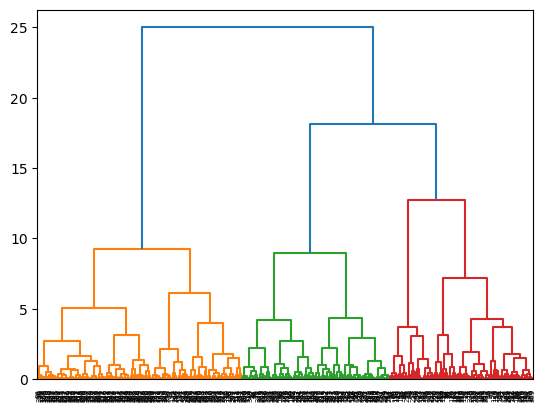

In [10]:
mds = MDS(random_state=0)
X_transform = mds.fit_transform(features)
X_transform

from scipy.cluster.vq import whiten

scaled_data = whiten(X_transform)
scaled_data

from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(scaled_data, method='ward')
grouped5['cluster_labels'] = fcluster(Z, 5, criterion='maxclust')

from scipy.cluster.hierarchy import dendrogram
Z = linkage(scaled_data, method='ward', metric='euclidean')
dn = dendrogram(Z)
plt.show()

In [22]:
labels = fcluster(Z, 5, criterion='maxclust')
positions = grouped5['POSITION']
df = pd.DataFrame({'labels': labels, 'positions': positions})
ct = pd.crosstab(df['labels'], df['positions'])
ct

positions,Center,Forward,Forward-Center,Forward-Guard,Guard
labels,,,,,
1,1,33,6,27,28
2,15,26,30,2,1
3,0,12,0,19,92
4,0,5,0,4,28
5,17,34,16,9,6


In [11]:
grouped5[grouped5['cluster_labels'] == 2]

,PLAYER_ID,NAME,POSITION,HEIGHT_CM,WEIGHT_KG,GP,GS,FGM_G,FGA_G,FG_PCT,...,TOV_G,PF_G,PTS_G,AST_G,REB_G,OREB_G,DREB_G,MIN_G,Cluster,cluster_labels
1,2617,Udonis Haslem,Forward,200.66,106.594207,43.650000,25.000000,2.300297,4.776435,0.454300,...,0.685575,1.816241,5.632357,0.606783,5.064826,1.288984,3.775841,18.455904,3,2
19,201580,JaVale McGee,Forward-Center,213.36,122.469940,45.428571,18.380952,3.196038,5.767141,0.554333,...,1.050315,2.168542,7.408319,0.441101,4.932359,1.740521,3.191837,16.194676,3,2
30,201949,James Johnson,Forward,200.66,108.862169,43.450000,14.000000,2.871315,6.185670,0.458200,...,1.318498,2.262092,7.257495,2.048871,3.456186,0.755537,2.700648,19.709726,3,2
49,202693,Markieff Morris,Forward,205.74,111.130131,49.833333,25.222222,3.775743,8.605370,0.433833,...,1.356086,2.608754,9.825423,1.425871,4.638423,1.075294,3.563129,22.450001,3,2
58,202722,Davis Bertans,Forward,208.28,102.058283,55.375000,4.875000,2.488887,6.069496,0.406750,...,0.520100,1.692047,7.741432,0.904091,2.604581,0.311522,2.293059,18.209194,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1630581,Josh Giddey,Guard,203.20,97.975952,28.500000,28.500000,5.768519,13.203704,0.435500,...,3.083333,2.148148,13.407407,5.694444,8.064815,1.740741,6.324074,30.407407,0,2
397,1630583,Santi Aldama,Forward-Center,213.36,97.522360,18.000000,2.000000,3.078125,6.687500,0.444000,...,0.625000,1.562500,8.437500,0.828125,5.109375,1.765625,3.343750,21.000000,3,2
399,1630586,Usman Garuba,Forward,203.20,103.872653,13.500000,1.500000,1.062500,2.083333,0.501500,...,1.125000,1.750000,2.666667,0.854167,4.562500,1.937500,2.625000,12.312500,1,2
400,1630587,Isaiah Livers,Forward,198.12,105.233430,11.000000,2.500000,2.412281,5.535088,0.438500,...,1.061404,2.640351,7.350877,1.219298,2.666667,0.728070,1.938596,20.078947,1,2


In [12]:
for clusters in grouped5['cluster_labels'].unique():
    print(clusters, grouped5[grouped5['cluster_labels'] == clusters]['NAME'].values[:5])

5 ['LeBron James' 'Andre Iguodala' 'Rudy Gay' 'P.J. Tucker' 'Kevin Durant']
2 ['Udonis Haslem' 'JaVale McGee' 'James Johnson' 'Markieff Morris'
 'Davis Bertans']
4 ['Chris Paul' 'Kyle Lowry' 'Mike Conley' 'Russell Westbrook' 'Ricky Rubio']
3 ['Derrick Rose' 'Eric Gordon' 'George Hill' 'Goran Dragic'
 'Patrick Beverley']
1 ['Alec Burks' 'Reggie Bullock' 'Doug McDermott' 'Justise Winslow'
 'Christian Wood']


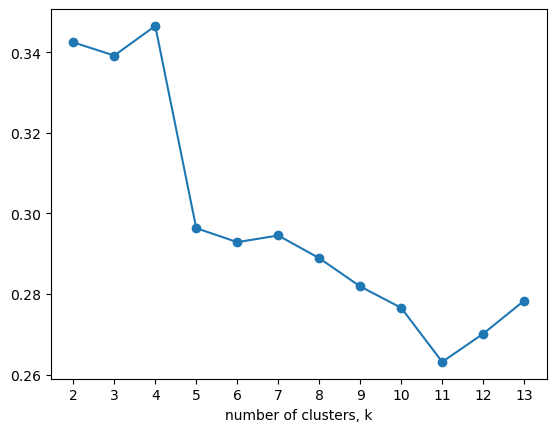

In [13]:
ks = range(2,14)
sh = []

for k in ks:
    Z = linkage(scaled_data, method='ward')
    grouped5['cluster_labels'] = fcluster(Z, k, criterion='maxclust')
    sh.append(silhouette_score(scaled_data, grouped5['cluster_labels']))
    
plt.plot(ks, sh, '-o')
plt.xlabel('number of clusters, k')
plt.xticks(ks)
plt.show()

# PCA

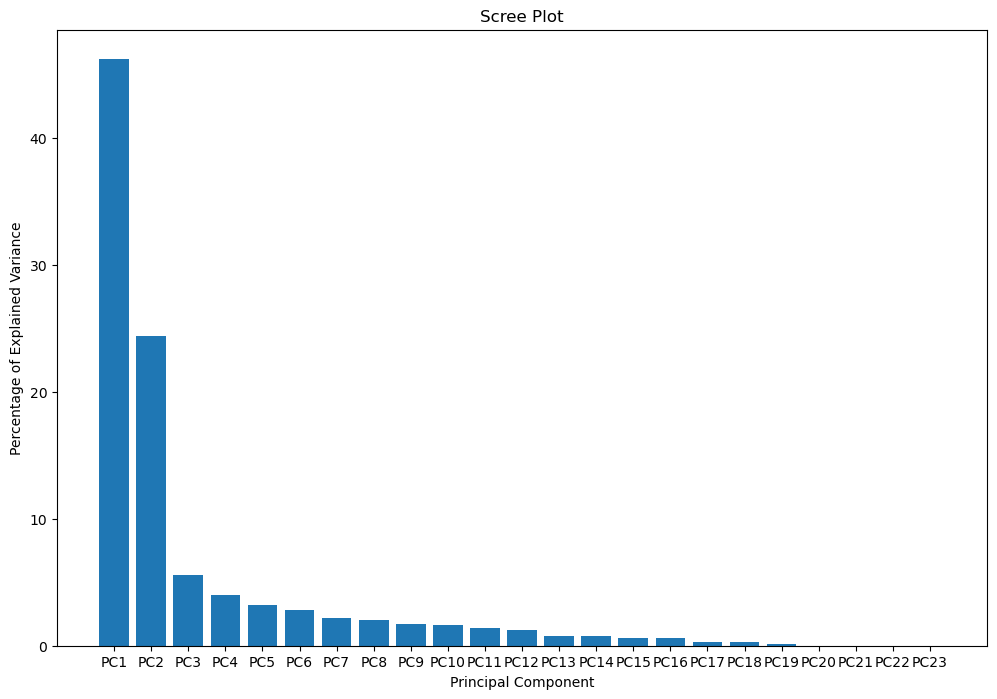

In [33]:
grouped5 = grouped5.set_index('NAME')
features = grouped5.iloc[:, 2:]

scaled_data = preprocessing.scale(features)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] # 1 label / principal component

plt.figure(figsize = (12, 8))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

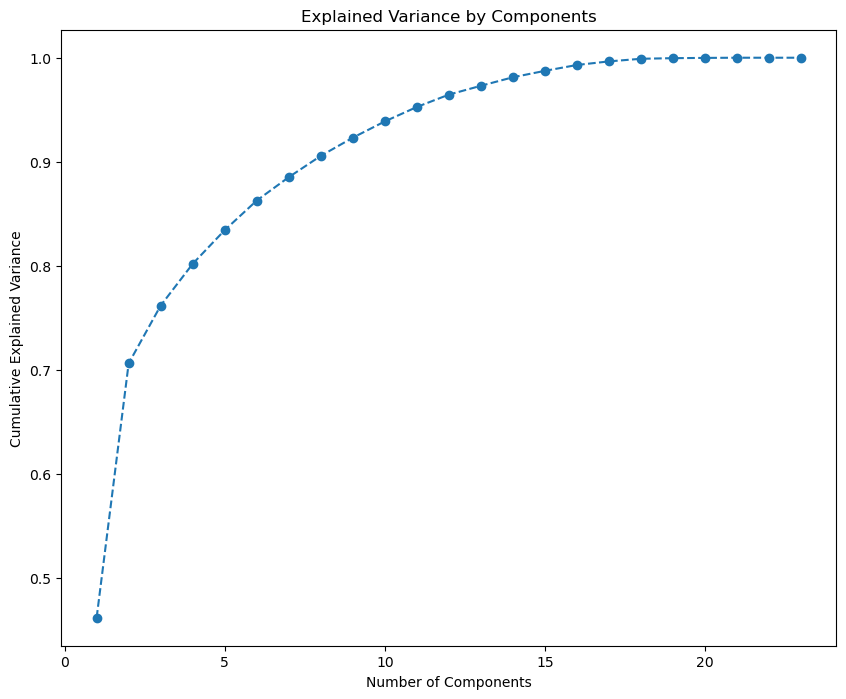

In [34]:
plt.figure(figsize=(10,8))
plt.plot(range(1,24), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

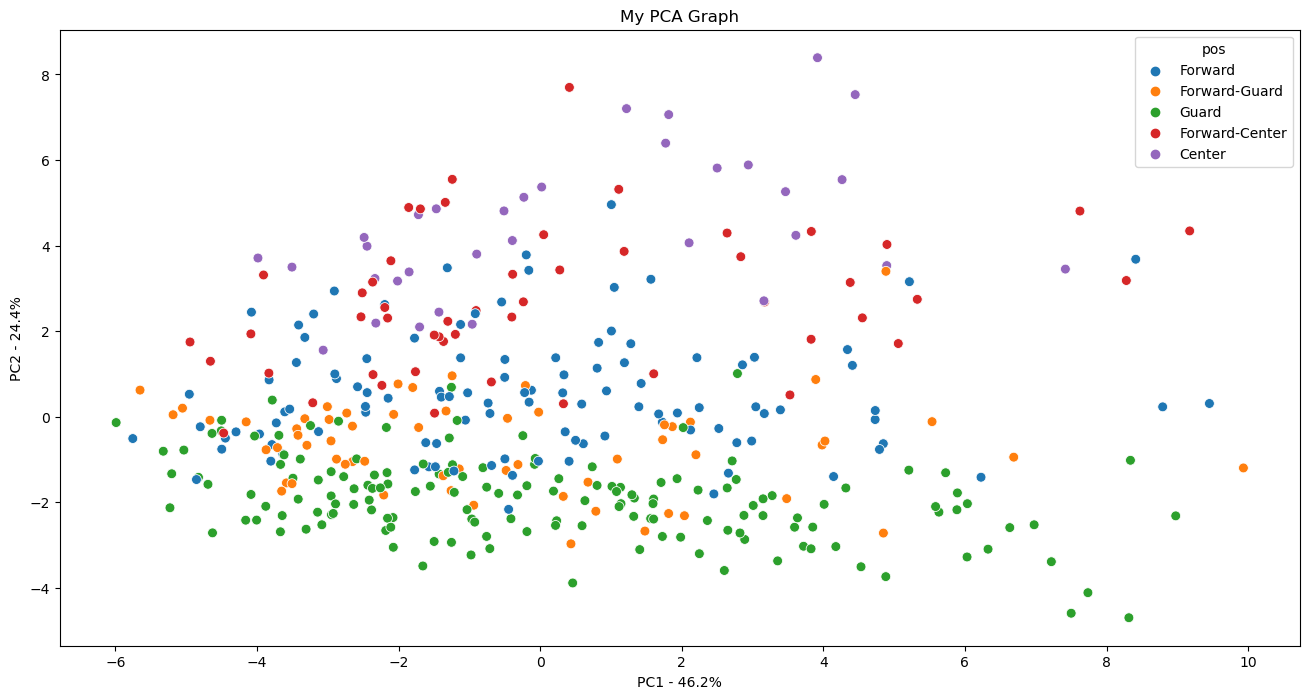

In [36]:
pca_df = pd.DataFrame(pca_data, columns=["PC{}".format(i+1) for i in range(pca_data.shape[1])])
pca_df["pos"] = positions

plt.figure(figsize = (16, 8))
sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', hue='pos', s = 50)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#for sample in pca_df.index:
#    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

In [37]:
#which features had the biggest influence on PC1
columns = list(features.columns)

loading_scores = pd.Series(pca.components_[0], index=columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

sorted_loading_scores.head()

PTS_G    0.293633
FGM_G    0.291539
MIN_G    0.288450
FGA_G    0.285251
FTM_G    0.270249
dtype: float64

# PCA K-Means

C:\Users\gelias006\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


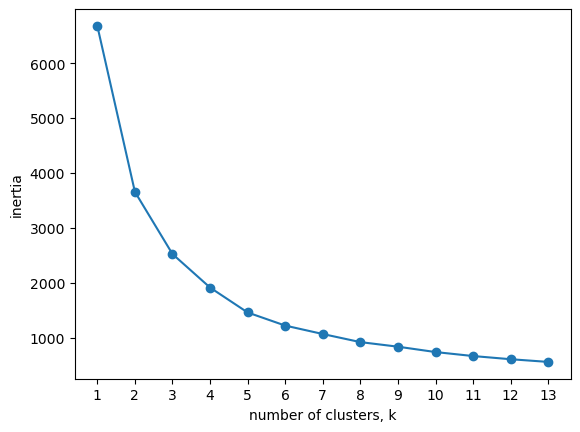

In [40]:
#Perform PCA with the chosen number of components

pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

#K-means

ks = range(1,14)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k, init='k-means++', random_state = 42)
    model.fit(pca_data)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [41]:
kmeans_pca = KMeans(n_clusters = 5, init='k-means++', random_state = 42)
kmeans_pca.fit(pca_data)

df_segm_pca_kmeans = pd.concat([features.reset_index(drop=True), pd.DataFrame(pca_data)], axis = 1)
df_segm_pca_kmeans.columns.values[-2: ] = ['Component_1', 'Component_2']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth'})

df_segm_pca_kmeans.head()

,HEIGHT_CM,WEIGHT_KG,GP,GS,FGM_G,FGA_G,FG_PCT,FG3M_G,FG3A_G,FG3_PCT,...,PTS_G,AST_G,REB_G,OREB_G,DREB_G,MIN_G,Component_1,Component_2,Segment K-means PCA,Segment
0,205.74,113.398093,68.500000,68.450000,9.914585,19.714668,0.504250,1.639755,4.840383,0.341250,...,27.019664,7.389632,7.631161,1.225582,6.405578,37.866351,9.453542,0.308129,0,first
1,200.66,106.594207,43.650000,25.000000,2.300297,4.776435,0.454300,0.022882,0.179324,0.050950,...,5.632357,0.606783,5.064826,1.288984,3.775841,18.455904,-2.195627,2.621503,1,second
2,198.12,97.522360,67.944444,43.555556,3.838901,8.340112,0.459556,0.862337,2.633940,0.326556,...,10.624609,4.085920,4.783895,0.887976,3.895919,30.978307,2.122190,-0.126452,2,third
3,182.88,79.378665,64.388889,64.388889,6.228555,13.291257,0.466167,1.355964,3.703557,0.363167,...,17.619239,9.518383,4.556774,0.620415,3.936359,34.437371,6.029964,-3.279030,0,first
4,203.20,113.398093,57.952381,44.095238,6.115552,13.737565,0.443952,1.086127,3.119920,0.347143,...,16.237014,2.172020,5.739898,1.314377,4.425521,31.446864,3.892594,0.869289,4,fifth


C:\Users\gelias006\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


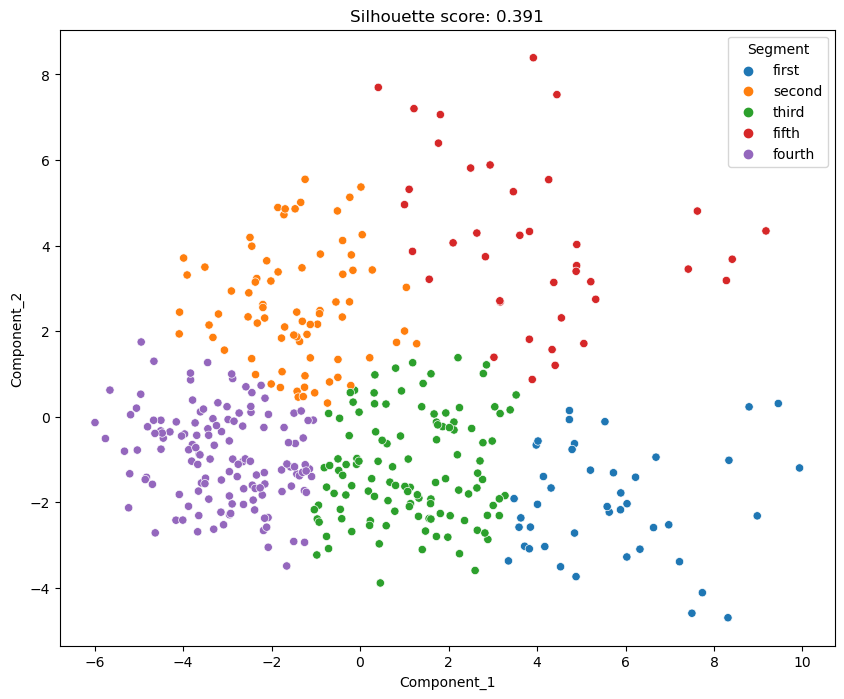

In [42]:
x_axis = df_segm_pca_kmeans['Component_1']
y_axis = df_segm_pca_kmeans['Component_2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['Segment'])
plt.title("Silhouette score: {}".format(round(silhouette_score(pca_data, kmeans_pca.labels_), 3)))

plt.show()

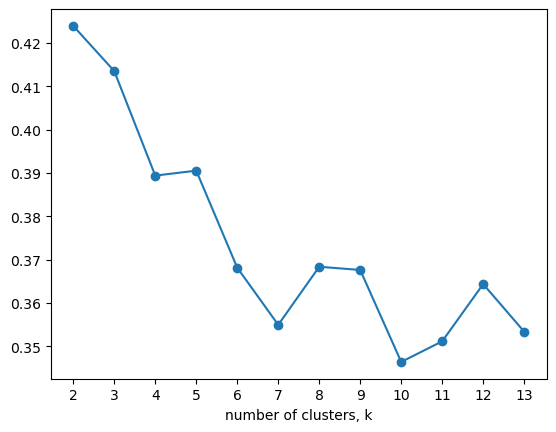

In [43]:
ks = range(2,14)
sh = []

for k in ks:
    model = KMeans(n_clusters = k, init='k-means++', random_state=42)
    model.fit_predict(pca_data)
    sh.append(silhouette_score(pca_data, model.labels_))
    
plt.plot(ks, sh, '-o')
plt.xlabel('number of clusters, k')
plt.xticks(ks)
plt.show()

In [111]:
#EDA

grouped5['Segment K-means PCA'] = kmeans_pca.labels_
grouped5['Cluster'] = grouped5['Segment K-means PCA'].map({0:'1.', 1:'2.', 2:'3.', 3:'4.', 4:'5.'})
grouped5[['NAME', 'POSITION', 'Cluster']]

,NAME,POSITION,Cluster
0,LeBron James,Forward,1.
1,Udonis Haslem,Forward,2.
2,Andre Iguodala,Forward-Guard,3.
3,Chris Paul,Guard,1.
4,Rudy Gay,Forward-Guard,5.
...,...,...,...
406,Duane Washington Jr.,Guard,4.
407,Jose Alvarado,Guard,4.
408,Terry Taylor,Forward,2.
409,Jamorko Pickett,Forward,4.


# LDA

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [65]:
positions = grouped5['POSITION'].to_list()

scaled_stats = preprocessing.scale(features)

lda = LinearDiscriminantAnalysis(n_components=2)
X_hat = lda.fit_transform(scaled_stats, positions)

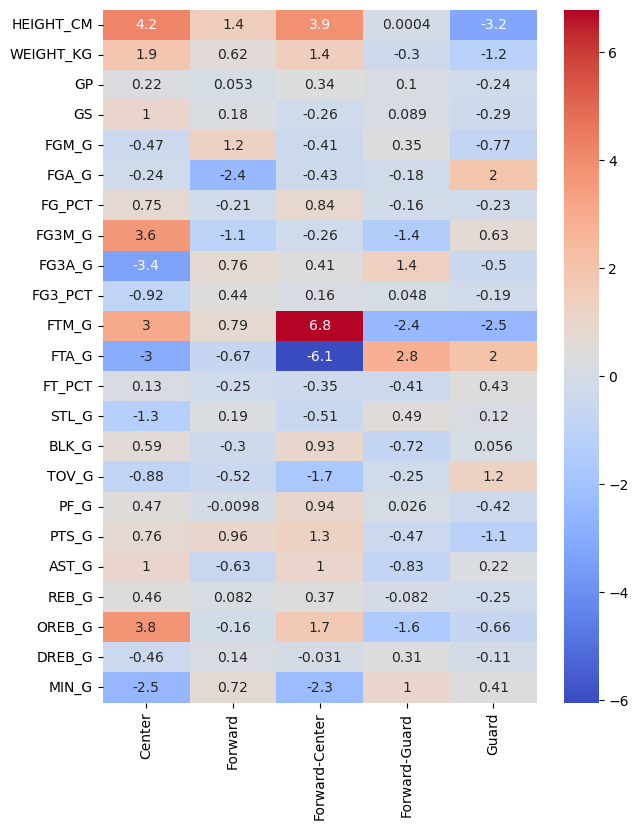

In [66]:
ldaCoefDf = pd.DataFrame(lda.coef_, index=lda.classes_, columns=features.columns)

plt.figure(figsize = (7,9))
sns.heatmap(ldaCoefDf.T, cmap="coolwarm", annot=True)
plt.show()

<AxesSubplot:title={'center':'LDA Class Coefficient Sums'}>

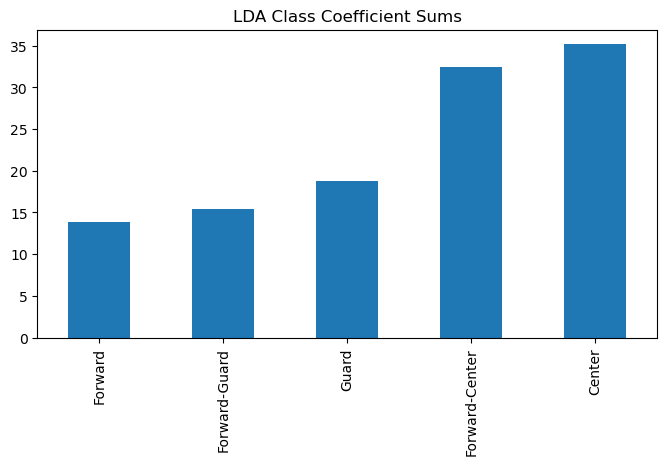

In [68]:
pd.Series(np.abs(lda.coef_).sum(axis=1), index=lda.classes_).sort_values().plot.bar(
    figsize=(8, 4), title="LDA Class Coefficient Sums")

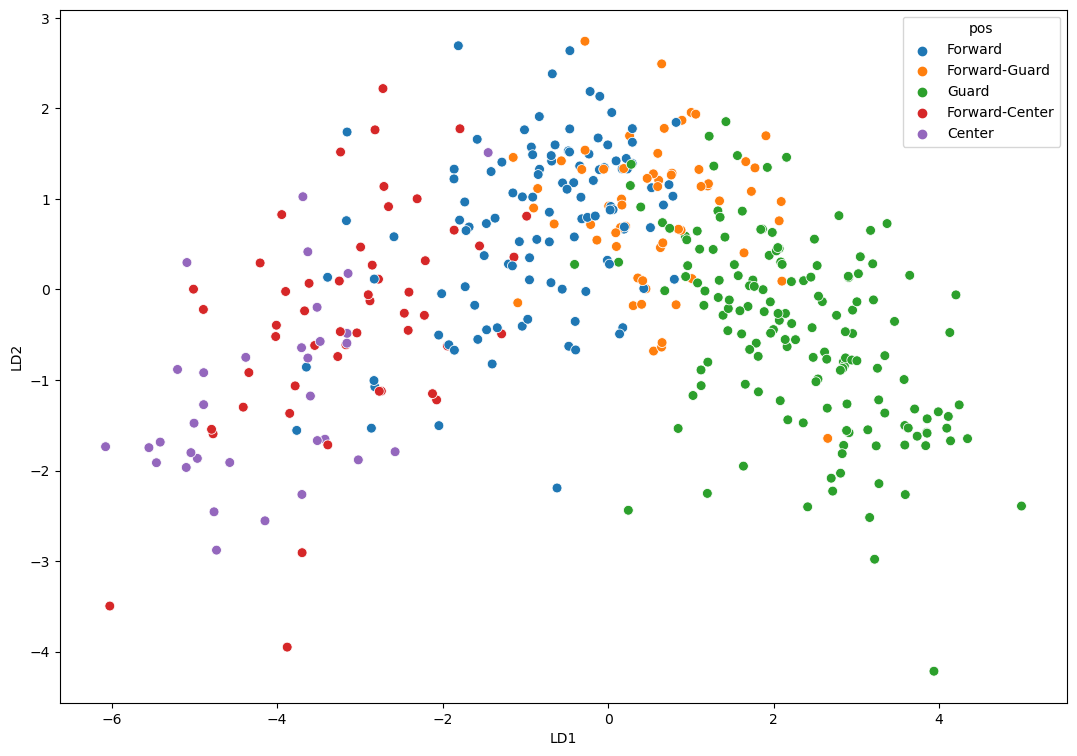

In [70]:
ldaDf = pd.DataFrame(X_hat, columns=["LD{}".format(i+1) for i in range(X_hat.shape[1])])
ldaDf["pos"] = positions

plt.figure(figsize = (13,9))
sns.scatterplot(data = ldaDf, x = "LD1", y = "LD2", hue = "pos", s = 50)
    
plt.show()

# LDA K-Means

C:\Users\gelias006\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


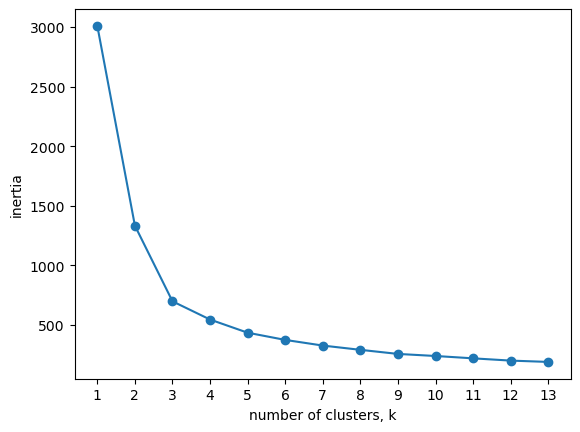

In [71]:
ks = range(1,14)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k, init='k-means++', random_state = 42)
    model.fit(X_hat)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

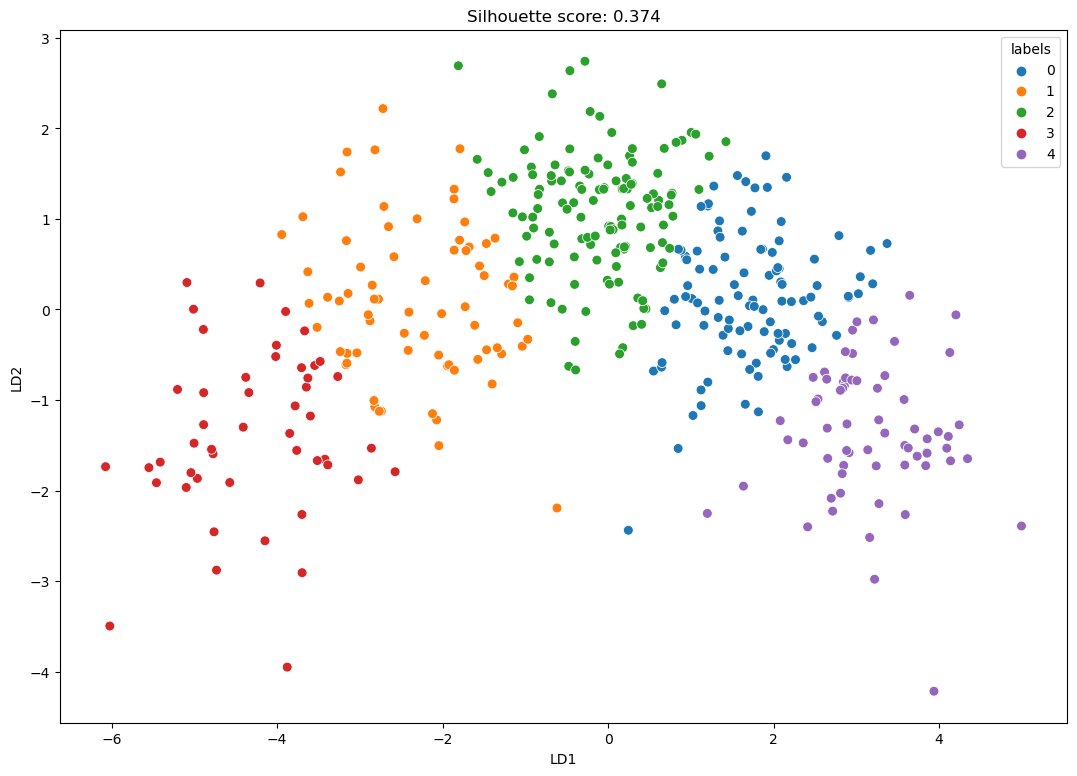

In [72]:
kmeans_lda = KMeans(n_clusters = 5, init='k-means++', random_state = 42)
kmeans_lda.fit(X_hat)

ldaDf["labels"] = kmeans_lda.labels_

plt.figure(figsize = (13,9))
sns.scatterplot(data = ldaDf, x = "LD1", y = "LD2", hue = "labels", s = 50, palette="tab10")
plt.title("Silhouette score: {}".format(round(silhouette_score(X_hat, kmeans_lda.labels_), 3)))
plt.show()

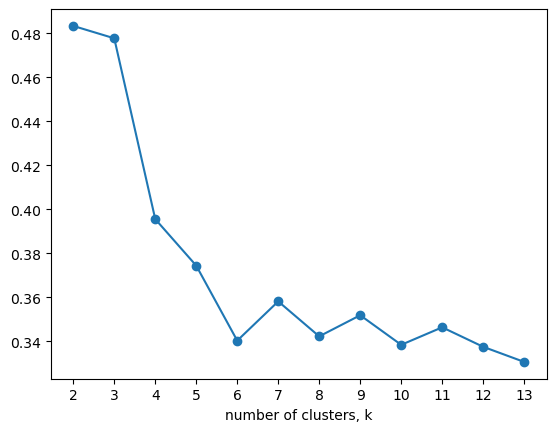

In [73]:
ks = range(2,14)
sh = []

for k in ks:
    model = KMeans(n_clusters = k, init='k-means++', random_state=42)
    model.fit_predict(X_hat)
    sh.append(silhouette_score(X_hat, model.labels_))
    
plt.plot(ks, sh, '-o')
plt.xlabel('number of clusters, k')
plt.xticks(ks)
plt.show()

In [118]:
#EDA

grouped5['Segment K-means LDA'] = kmeans_lda.labels_
grouped5['Cluster'] = grouped5['Segment K-means LDA'].map({0:'1.', 1:'2.', 2:'3.', 3:'4.', 4:'5.'})
grouped5['Position_based_on_clustering'] = grouped5['Segment K-means LDA'].map({0:'Forward-Guard', 1:'Forward-Center', 2:'Forward', 3:'Center', 4:'Guard'})
grouped5['Check similarity'] = grouped5['POSITION'] == grouped5['Position_based_on_clustering']
grouped5[['NAME', 'POSITION', 'Position_based_on_clustering', 'Check similarity']]

,NAME,POSITION,Position_based_on_clustering,Check similarity
0,LeBron James,Forward,Forward,True
1,Udonis Haslem,Forward,Forward-Center,False
2,Andre Iguodala,Forward-Guard,Forward,False
3,Chris Paul,Guard,Guard,True
4,Rudy Gay,Forward-Guard,Forward,False
...,...,...,...,...
406,Duane Washington Jr.,Guard,Forward-Guard,False
407,Jose Alvarado,Guard,Guard,True
408,Terry Taylor,Forward,Forward-Center,False
409,Jamorko Pickett,Forward,Forward,True


In [119]:
grouped5.groupby('Check similarity').count()['PLAYER_ID']

Check similarity
False    196
True     215
Name: PLAYER_ID, dtype: int64

In [123]:
true = grouped5[grouped5['Check similarity'] == True]

accuracy = true['Position_based_on_clustering'].count() / grouped5['Position_based_on_clustering'].count() * 100

print("The models accuracy: " + str(accuracy) + " %")

The models accuracy: 52.311435523114355 %


In [126]:
#Centers

center = grouped5[grouped5['POSITION'] == 'Center']
true = center[center['Check similarity'] == True]
print('Model accuracy: ' + str(true['PLAYER_ID'].count() / center['PLAYER_ID'].count() * 100) + ' %')

Model accuracy: 78.78787878787878 %
